In [708]:
from seaborn import pairplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import plotly
import plotly.graph_objs as go

In [709]:
# Load the data and create training and testing data
df = pd.read_csv('coffeequality.csv')
df = df.dropna()
#pairplot(df, hue='Shape')
#plt.show()

X = df.drop(columns = ['Shape'])
y = df['Shape']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=100)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((177, 13), (60, 13))

0.85
              precision    recall  f1-score   support

          FL       0.92      0.92      0.92        39
          MI       0.81      0.72      0.76        18
          PE       0.40      0.67      0.50         3

    accuracy                           0.85        60
   macro avg       0.71      0.77      0.73        60
weighted avg       0.86      0.85      0.85        60



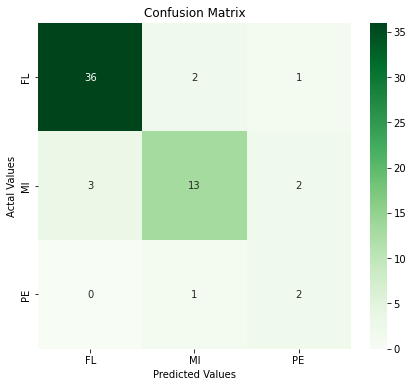

In [710]:
# Create a transformer object

ord_features = ["Sieve"]
ordinal_transformer = OneHotEncoder(handle_unknown="ignore")

cat_features = ["Variety"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

ct = ColumnTransformer(transformers=[
    ("ord", ordinal_transformer, ord_features),
    ("cat", categorical_transformer, cat_features )],
    remainder='passthrough'
)

# Transform the training features
X_train = ct.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=ct.get_feature_names_out())

# Building and fit the classifier
clf = SVC(kernel='rbf', gamma=0.01, C=1000)
clf.fit(X_train, y_train)

# Transform the training data
X_test = ct.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=ct.get_feature_names_out())

# Make predictions and check the accuracy
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

target_names = ['FL', 'MI', 'PE']
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,
                     index = ['FL','MI','PE'], 
                     columns = ['FL','MI','PE'])
plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [690]:
# Testing with an entry
CoffeeBean = [{
    'Variety': 'OA', 
    'Sieve': '15', 
    'Aroma': 6.75, 
    'Flavor': 6.25, 
    'Aftertaste': 6.25, 
    'Acidity': 6.25,
    'Body': 6.25,
    'Uniformity': 10,
    'Balance': 7,
    'clean cup': 10,
    'Sweetness': 10,
    'Taster score': 6,
    'Final score': 74.75
}]
CoffeeBean = pd.DataFrame(CoffeeBean)
df_transformed = ct.transform(CoffeeBean)
df_transformed = pd.DataFrame(df_transformed, columns=ct.get_feature_names_out())
predicted_shape = clf.predict(df_transformed)
print(predicted_shape)

['MI']


In [691]:
markercolor = df['Sieve']

#Make Plotly figure
fig1 = go.Scatter3d(x=df['Variety'],
                    y=df['Shape'],
                    z=df['Final score'],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Greens',
                                size=5),
                    line=dict (width=0.05),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Variety"),
                                yaxis=dict( title="Shape"),
                                zaxis=dict(title="Final score")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("4DPlot.html"))

'4DPlot.html'